In [21]:
import pymysql
import pandas as pd

conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT * 
        FROM AWS_Weather_H
        WHERE 1 = 1
        AND dttm BETWEEN '2020-10-01 00:00' AND '2020-10-01 23:00'
        AND sido = '서울특별시'
    '''
    cur.execute(sql)
    result = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result))

마리아에서 불러온 행 수 : 600


In [22]:
dfResult = pd.DataFrame(result)
dfResult

,dttm,sido,sigungu,temp,winddeg,windspeed,rainfall,placehpa,seahpa,humidity,createdate
0,2020-10-01 00:00,서울특별시,강남구,17.7727,120.8940,1.333360,0.0,277.565,278.753,56.6953,None
1,2020-10-01 00:00,서울특별시,강동구,18.5470,74.8089,1.211200,0.0,277.565,278.753,47.1865,None
2,2020-10-01 00:00,서울특별시,강북구,17.1007,232.5800,0.838094,0.0,277.565,278.753,87.3639,None
3,2020-10-01 00:00,서울특별시,강서구,18.6179,71.1601,1.309560,0.0,277.565,278.753,23.5547,None
4,2020-10-01 00:00,서울특별시,관악구,14.9421,113.0370,1.013040,0.0,326.608,327.222,61.9307,None
...,...,...,...,...,...,...,...,...,...,...,...
595,2020-10-01 23:00,서울특별시,용산구,17.6685,127.9420,0.567399,0.0,266.900,267.401,23.6283,None
596,2020-10-01 23:00,서울특별시,은평구,15.9052,51.3996,0.351767,0.0,268.931,269.458,17.5261,None
597,2020-10-01 23:00,서울특별시,종로구,16.6339,104.6900,0.464058,0.0,372.030,376.562,24.2137,None
598,2020-10-01 23:00,서울특별시,중구,17.2761,111.3220,0.735803,0.0,318.442,322.321,43.8342,None


In [ ]:
# 스파크 df로 변환 스파크 세션 생성 후 사용 가능
# spkdfResult = spark.createDataFrame(dfResult)

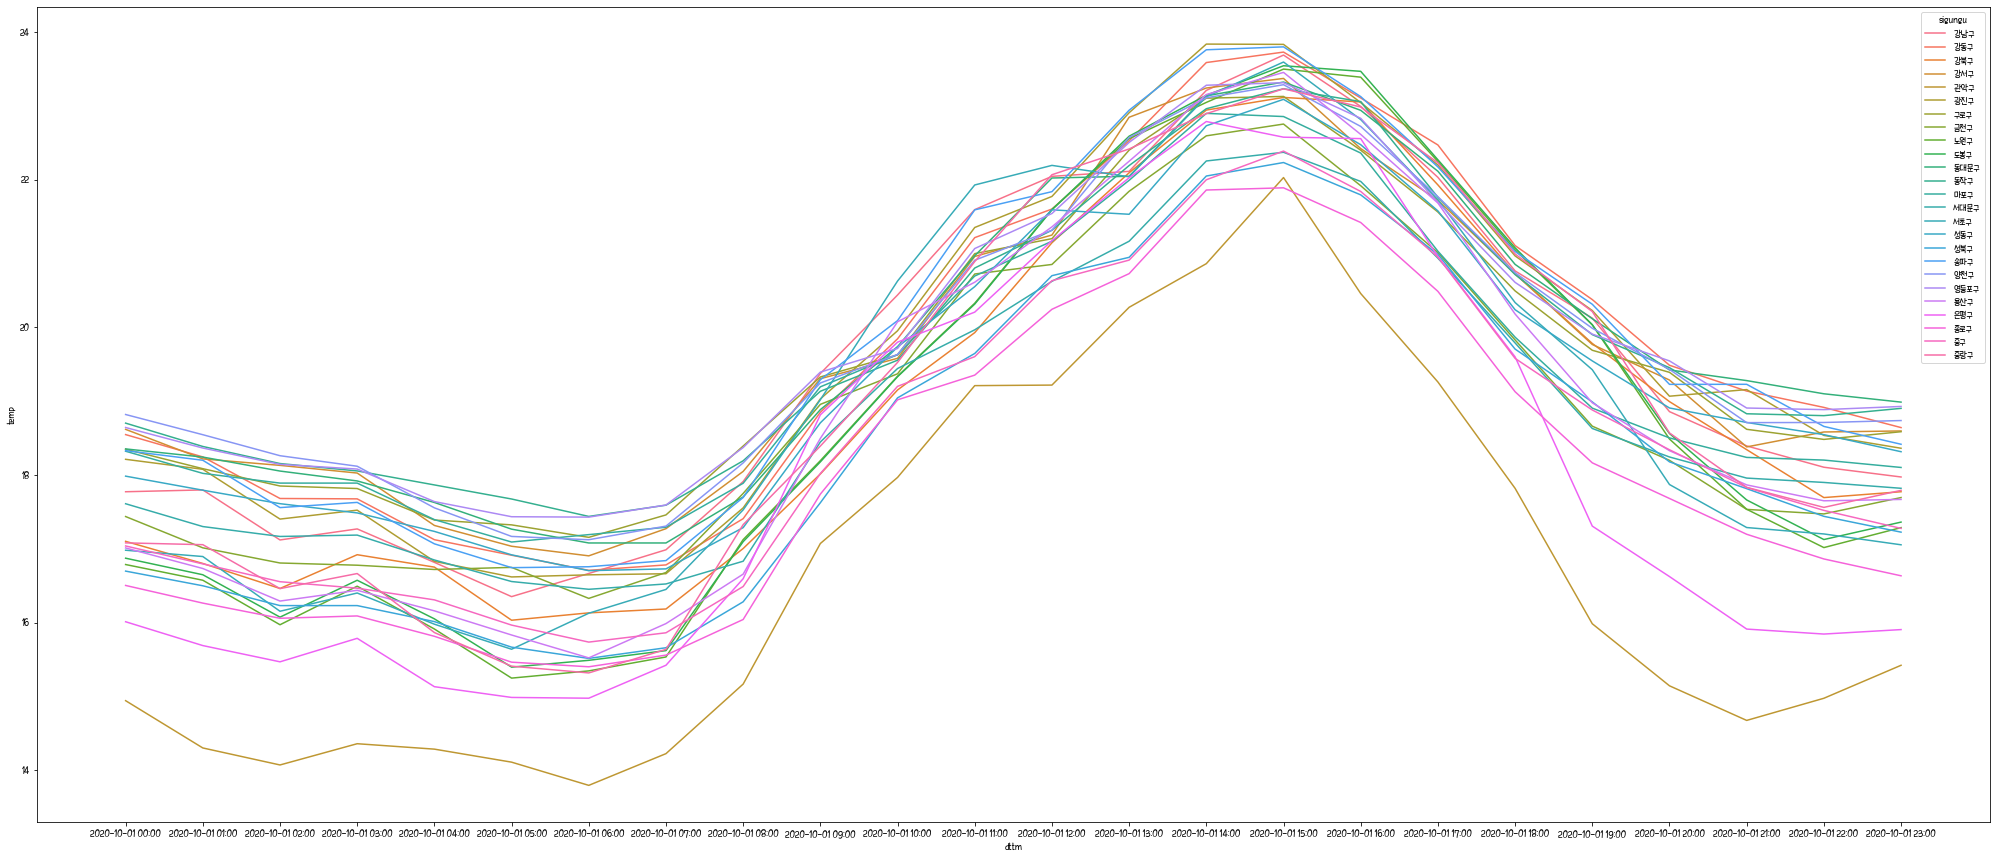

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/PyStexam/data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(35, 15))
sns.lineplot(x="dttm", y="temp", hue="sigungu", data=dfResult)
plt.show()

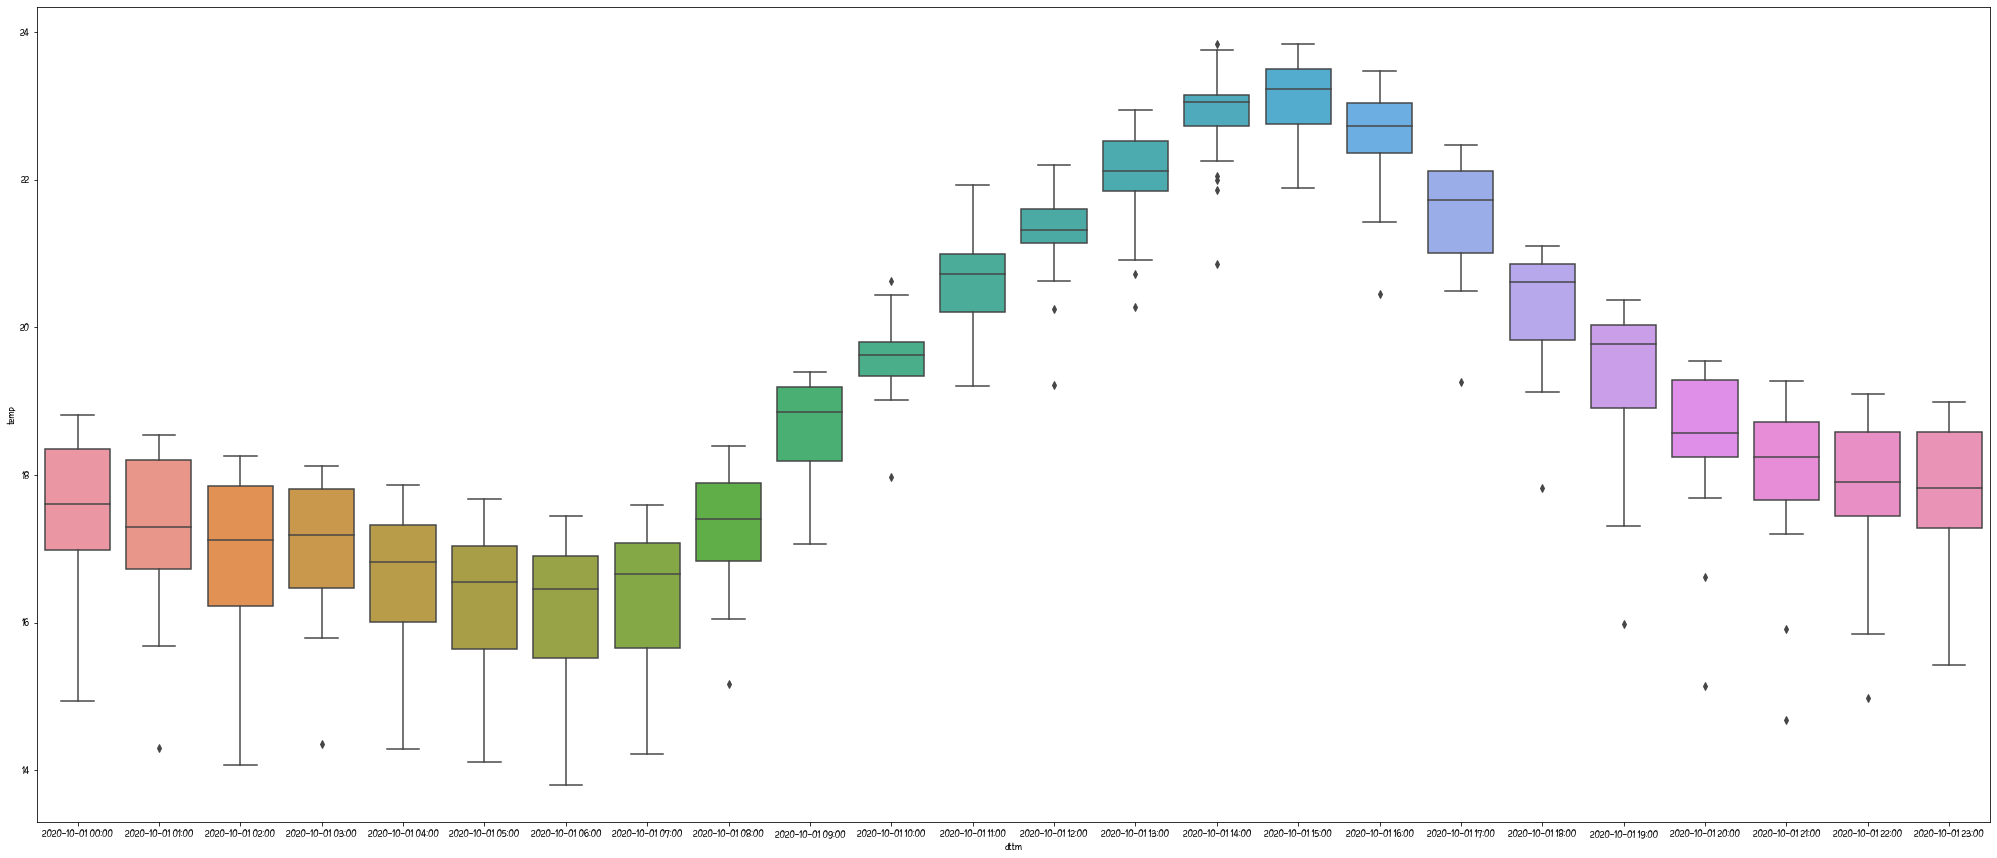

In [20]:
plt.figure(figsize=(35, 15))
sns.boxplot(x='dttm', y='temp', data=dfResult) 
plt.show()